In [1]:
import numpy as np
import matplotlib.pyplot as plt

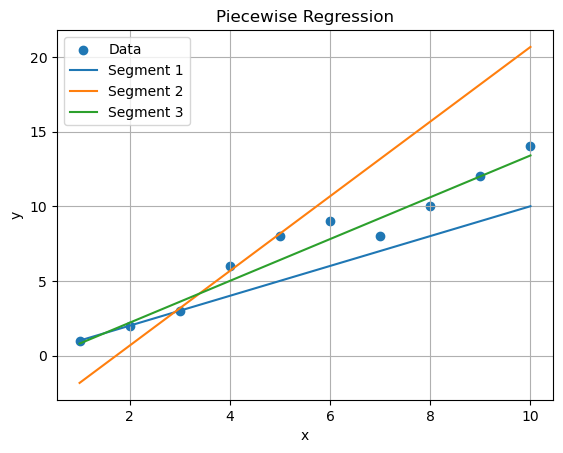

In [2]:
def piecewise_regression(x, y, breakpoints):
    models = []
    x_ext = np.concatenate([[0], breakpoints, [np.inf]])
    
    for i in range(len(breakpoints) + 1):
        mask = (x >= x_ext[i]) & (x < x_ext[i+1])
        segment_x = x[mask]
        segment_y = y[mask]
        segment_x = np.vstack([np.ones_like(segment_x), segment_x]).T
        model = np.linalg.lstsq(segment_x, segment_y, rcond=None)[0]
        models.append(model)
    
    return models

# Example data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 6, 8, 9, 8, 10, 12, 14])

# Example breakpoints
breakpoints = [3, 6]

# Perform piecewise regression
models = piecewise_regression(x, y, breakpoints)

# Plot the data points
plt.scatter(x, y, label='Data')

# Plot the piecewise regression lines
for i, model in enumerate(models):
    segment_x = np.array([x.min(), x.max()])
    segment_y = np.dot(np.vstack([np.ones_like(segment_x), segment_x]).T, model)
    plt.plot(segment_x, segment_y, label=f'Segment {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Regression')
plt.legend()
plt.grid(True)
plt.show()

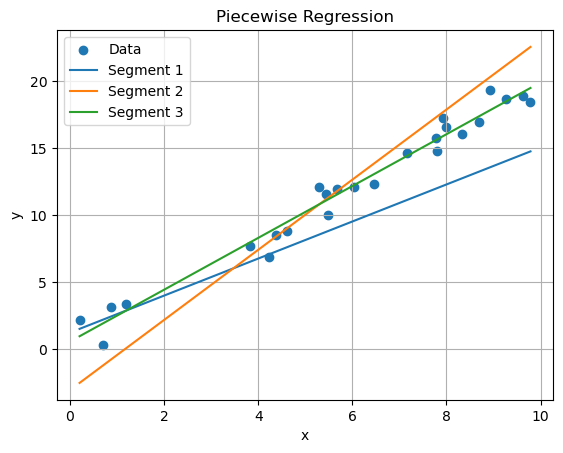

In [4]:

def generate_random_data():
    np.random.seed(0)
    x = np.random.uniform(0, 10, 25)
    y = 2 * x + np.random.normal(0, 1, 25)
    return x, y

def piecewise_regression(x, y, breakpoints):
    models = []
    x_ext = np.concatenate([[0], breakpoints, [np.inf]])
    
    for i in range(len(breakpoints) + 1):
        mask = (x >= x_ext[i]) & (x < x_ext[i+1])
        segment_x = x[mask]
        segment_y = y[mask]
        segment_x = np.vstack([np.ones_like(segment_x), segment_x]).T
        model = np.linalg.lstsq(segment_x, segment_y, rcond=None)[0]
        models.append(model)
    
    return models

# Generate random data
x, y = generate_random_data()

# Example breakpoints
breakpoints = [3, 6]

# Perform piecewise regression
models = piecewise_regression(x, y, breakpoints)

# Plot the data points
plt.scatter(x, y, label='Data')

# Plot the piecewise regression lines
for i, model in enumerate(models):
    segment_x = np.array([x.min(), x.max()])
    segment_y = np.dot(np.vstack([np.ones_like(segment_x), segment_x]).T, model)
    plt.plot(segment_x, segment_y, label=f'Segment {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Regression')
plt.legend()
plt.grid(True)
plt.show()


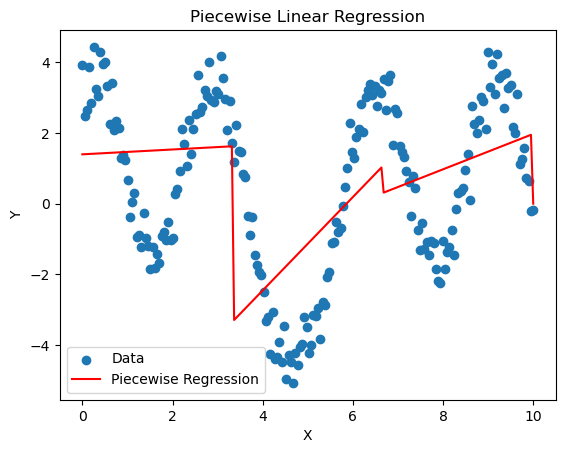

In [13]:

def piecewise_regression(x, y, num_segments):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    
    x_normalized = (x - x_mean) / x_std
    y_normalized = (y - y_mean) / y_std
    
    segments = np.linspace(np.min(x_normalized), np.max(x_normalized), num_segments+1)
    breakpoints = [np.searchsorted(x_normalized, s, side='right') for s in segments]
    
    slopes = []
    intercepts = []
    for i in range(num_segments):
        x_segment = x_normalized[breakpoints[i]:breakpoints[i+1]]
        y_segment = y_normalized[breakpoints[i]:breakpoints[i+1]]
        
        # Fit a line to the segment
        A = np.vstack([x_segment, np.ones(len(x_segment))]).T
        m, c = np.linalg.lstsq(A, y_segment, rcond=None)[0]
        
        slopes.append(m)
        intercepts.append(c)
    
    # De-normalize the coefficients
    slopes = np.array(slopes) * (y_std / x_std)
    intercepts = np.array(intercepts) * y_std + y_mean - slopes * x_mean
    
    return slopes, intercepts

def predict_piecewise(x, slopes, intercepts, segments):
    preds = np.zeros_like(x)
    for i in range(len(segments) - 1):
        mask = (x >= segments[i]) & (x < segments[i+1])
        preds[mask] = slopes[i] * x[mask] + intercepts[i]
    return preds

# Generate x values
x = np.linspace(0, 10, 200)

# Generate y values with a combination of sine and cosine functions
y = 2 * np.sin(x) + 3 * np.cos(2*x) + 0.5 * np.sin(3*x) + np.random.normal(0, 0.5, 200)


# Perform piecewise regression
num_segments = 3
slopes, intercepts = piecewise_regression(x, y, num_segments)

# Plot the data and regression line
plt.scatter(x, y, label='Data')
segments = np.linspace(np.min(x), np.max(x), num_segments+1)
plt.plot(x, predict_piecewise(x, slopes, intercepts, segments), color='red', label='Piecewise Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Piecewise Linear Regression')
plt.legend()
plt.show()


In [1]:

def piecewise_regression(x, y, num_segments):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    
    x_normalized = (x - x_mean) / x_std
    y_normalized = (y - y_mean) / y_std
    
    segments = np.linspace(np.min(x_normalized), np.max(x_normalized), num_segments+1)
    breakpoints = [np.searchsorted(x_normalized, s, side='right') for s in segments]
    
    slopes = []
    intercepts = []
    for i in range(num_segments):
        x_segment = x_normalized[breakpoints[i]:breakpoints[i+1]]
        y_segment = y_normalized[breakpoints[i]:breakpoints[i+1]]
        
        # Fit a line to the segment
        A = np.vstack([x_segment, np.ones(len(x_segment))]).T
        m, c = np.linalg.lstsq(A, y_segment, rcond=None)[0]
        
        slopes.append(m)
        intercepts.append(c)
    
    # De-normalize the coefficients
    slopes = np.array(slopes) * (y_std / x_std)
    intercepts = np.array(intercepts) * y_std + y_mean - slopes * x_mean
    
    return slopes, intercepts

def predict_piecewise(x, slopes, intercepts, segments):
    preds = np.zeros_like(x)
    for i in range(len(segments) - 1):
        mask = (x >= segments[i]) & (x < segments[i+1])
        preds[mask] = slopes[i] * x[mask] + intercepts[i]
    return preds

# Generate some sample data
x = np.linspace(0, 10, 200)
y = 2 * np.sin(x) + 3 * np.cos(2*x) + 0.5 * np.sin(3*x) + np.random.normal(0, 0.5, 200)  # Curvy data with noise

# Perform piecewise regression
num_segments = 6  # Adjust as needed to get desired number of breakpoints
slopes, intercepts = piecewise_regression(x, y, num_segments)

# Plot the data and regression line
plt.scatter(x, y, label='Data')
segments = np.linspace(np.min(x), np.max(x), num_segments+1)
plt.plot(x, predict_piecewise(x, slopes, intercepts, segments), color='red', label='Piecewise Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Piecewise Linear Regression')
plt.legend()
plt.show()


NameError: name 'np' is not defined

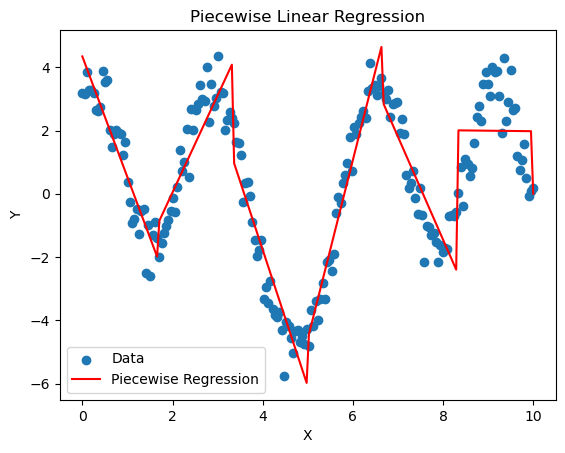

In [15]:
def piecewise_regression(x, y, num_segments):
    # Normalize the data
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    x_normalized = (x - x_mean) / x_std
    y_normalized = (y - y_mean) / y_std
    
    # Divide x into segments
    segments = np.linspace(np.min(x_normalized), np.max(x_normalized), num_segments+1)
    
    # Find breakpoints
    breakpoints = []
    for s in segments:
        breakpoints.append(np.searchsorted(x_normalized, s, side='right'))
    
    # Fit lines to segments
    slopes = []
    intercepts = []
    for i in range(num_segments):
        x_segment = x_normalized[breakpoints[i]:breakpoints[i+1]]
        y_segment = y_normalized[breakpoints[i]:breakpoints[i+1]]
        A = np.vstack([x_segment, np.ones(len(x_segment))]).T
        m, c = np.linalg.lstsq(A, y_segment, rcond=None)[0]
        slopes.append(m)
        intercepts.append(c)
    
    # De-normalize the coefficients
    slopes = np.array(slopes) * (y_std / x_std)
    intercepts = np.array(intercepts) * y_std + y_mean - slopes * x_mean
    
    return slopes, intercepts

def predict_piecewise(x, slopes, intercepts, segments):
    preds = np.zeros_like(x)
    for i in range(len(segments) - 1):
        mask = (x >= segments[i]) & (x < segments[i+1])
        preds[mask] = slopes[i] * x[mask] + intercepts[i]
    return preds

# Generate some sample data
x = np.linspace(0, 10, 200)
y = 2 * np.sin(x) + 3 * np.cos(2*x) + 0.5 * np.sin(3*x) + np.random.normal(0, 0.5, 200)  # Curvy data with noise

# Perform piecewise regression
num_segments = 6  # Adjust as needed to get desired number of breakpoints
slopes, intercepts = piecewise_regression(x, y, num_segments)

# Plot the data and regression line
plt.scatter(x, y, label='Data')
segments = np.linspace(np.min(x), np.max(x), num_segments+1)
plt.plot(x, predict_piecewise(x, slopes, intercepts, segments), color='red', label='Piecewise Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Piecewise Linear Regression')
plt.legend()
plt.show()


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
def f(x):
  return (x-1)*(x-5)*(x-11) + 10*np.random.randn()
     

In [4]:
x = [i/10 for i in range(120)]
y = [f(i) for i in x]

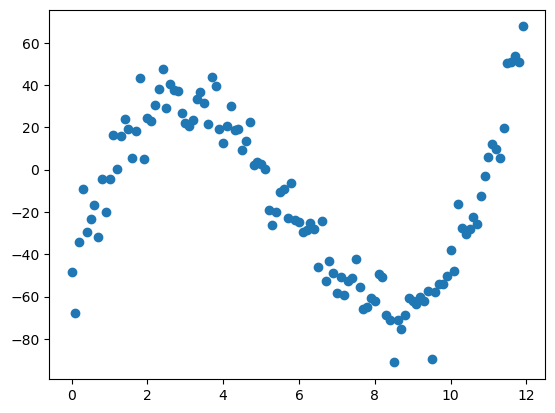

In [5]:
plt.scatter(x,y)

In [6]:
def eval(x,m,a):
  bucket = int(x/a) + 1
  if bucket >= len(m):
    w = m[-1]
    b = a*(sum(m) - (len(m)-1)*w)
  else:
    w = m[bucket]
    b = a*(sum(m[:bucket+1]) - bucket*w)
  return w*x + b
     

In [7]:
lr = 0.05 # Learning Rate
iter = 1000

In [8]:
m = [np.random.randn() for _ in range(9)]   # Initialising with random slopes
costs = []
     

In [10]:
min_cost = float('inf')
min_m = []
a = 1.5
for e in range(1, iter+1):
    new = [0] * len(m)
    cost1 = 0
    cost2 = 0
    for i in range(len(x)):
        pred = eval(x[i], m, a)
        cost1 += ((y[i] - pred) ** 2) / len(x)
        for j in range(len(m)):
            cost2 += 0 if j <= 1 else 0.002 * ((m[j] - m[j - 1]) ** 2) / (2 * len(m) - 4)
            if j == int(x[i] / a) + 1:
                new[j] += 2 * (pred - y[i]) * (x[i] - int(x[i] / a)) / len(x)
            else:
                new[j] += 2 * (pred - y[i]) / len(x)
            if j > 1:
                new[j] += (0.002) * (m[j] - m[j - 1]) / (len(m) - 2)
            if j < len(m) - 1:
                new[j] += (0.002) * (m[j] - m[j + 1]) / (len(m) - 2)
    m = [i - lr * j for i, j in zip(m, new)]
    print("Iteration: {}, Cost: {}".format(e, cost1 + cost2))


Iteration: 1, Cost: 1524.2541005930295
Iteration: 2, Cost: 1363.844890627256
Iteration: 3, Cost: 1338.2985719683024
Iteration: 4, Cost: 1320.3921211481959
Iteration: 5, Cost: 1303.5648815283212
Iteration: 6, Cost: 1287.25058754987
Iteration: 7, Cost: 1271.3373477885627
Iteration: 8, Cost: 1255.761700160025
Iteration: 9, Cost: 1240.469578060807
Iteration: 10, Cost: 1225.4127774794604
Iteration: 11, Cost: 1210.5486558522714
Iteration: 12, Cost: 1195.839918798373
Iteration: 13, Cost: 1181.254337318011
Iteration: 14, Cost: 1166.7644397386612
Iteration: 15, Cost: 1152.3472001352143
Iteration: 16, Cost: 1137.9837301787718
Iteration: 17, Cost: 1123.6589767167168
Iteration: 18, Cost: 1109.3614261458902
Iteration: 19, Cost: 1095.0828163039123
Iteration: 20, Cost: 1080.817856482629
Iteration: 21, Cost: 1066.563956095514
Iteration: 22, Cost: 1052.3209624698575
Iteration: 23, Cost: 1038.0909081765808
Iteration: 24, Cost: 1023.877768254199
Iteration: 25, Cost: 1009.6872276283509
Iteration: 26, Cost

In [11]:
ydash = [eval(a*i, min_m, a) for i in range(0,int(12/a)+1)]
plt.scatter(x,y,label="Data Point")
plt.plot([a*i for i in range(0,int(12/a)+1)],ydash, color="r",label="Approximated Trend")
plt.plot([a*i for i in range(0,int(12/a)+1)],[(a*i-1)*(a*i-5)*(a*i-11) for i in range(0,int(12/a)+1)], color="k",label="Original Trend")
plt.legend()

IndexError: list index out of range

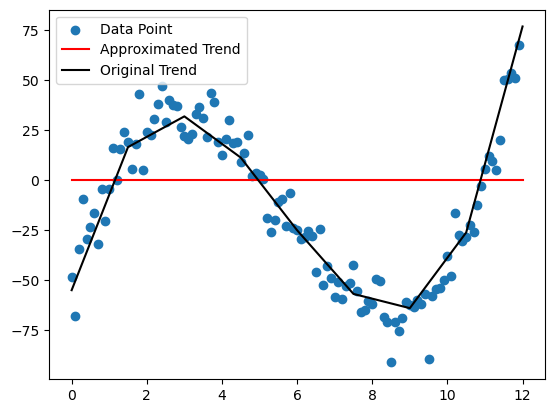

In [13]:

# Define eval function
def eval(x, m, a):
    bucket = int(x / a) + 1
    max_bucket_index = bucket if bucket > 0 else 1
    if max_bucket_index >= len(m):
        m.extend([0] * (max_bucket_index - len(m) + 1))
    if bucket >= len(m):
        w = m[-1]
        b = a * (sum(m) - (len(m) - 1) * w)
    else:
        w = m[bucket - 1]
        b = a * (sum(m[:bucket]) - (bucket - 1) * w)
    return w * x + b

# Calculate ydash
ydash = [eval(a * i, min_m, a) for i in range(0, int(12 / a) + 1)]

# Plotting
plt.scatter(x, y, label="Data Point")
plt.plot([a * i for i in range(0, int(12 / a) + 1)], ydash, color="r", label="Approximated Trend")
plt.plot([a * i for i in range(0, int(12 / a) + 1)], [(a * i - 1) * (a * i - 5) * (a * i - 11) for i in range(0, int(12 / a) + 1)], color="k", label="Original Trend")
plt.legend()

# Show plot
plt.show()


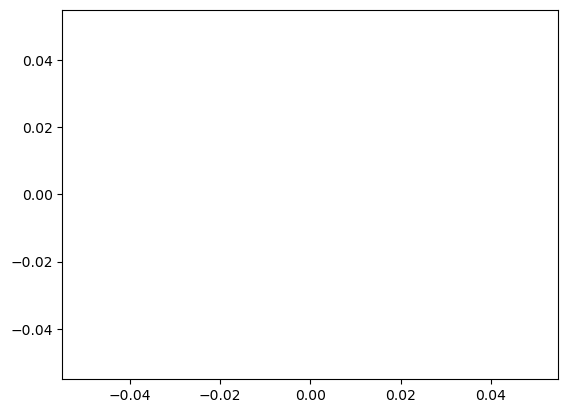

In [14]:
plt.plot(range(len(costs)),costs)

Iteration: 1, Cost: 1446.722333597094
Iteration: 2, Cost: 1182.033713135022
Iteration: 3, Cost: 1159.184380933844
Iteration: 4, Cost: 1145.3230732110462
Iteration: 5, Cost: 1131.9867529555927
Iteration: 6, Cost: 1118.9044840965096
Iteration: 7, Cost: 1106.0616686743624
Iteration: 8, Cost: 1093.4292484306354
Iteration: 9, Cost: 1080.9729950360615
Iteration: 10, Cost: 1068.6603975018295
Iteration: 11, Cost: 1056.4625065610282
Iteration: 12, Cost: 1044.3542018462497
Iteration: 13, Cost: 1032.3140609423847
Iteration: 14, Cost: 1020.3241388262732
Iteration: 15, Cost: 1008.3697310311345
Iteration: 16, Cost: 996.4391373638322
Iteration: 17, Cost: 984.5234302186528
Iteration: 18, Cost: 972.6162287222944
Iteration: 19, Cost: 960.713479315349
Iteration: 20, Cost: 948.8132432085769
Iteration: 21, Cost: 936.9154910818136
Iteration: 22, Cost: 925.0219053432419
Iteration: 23, Cost: 913.1356902214424
Iteration: 24, Cost: 901.2613899191986
Iteration: 25, Cost: 889.4047150159108
Iteration: 26, Cost: 87

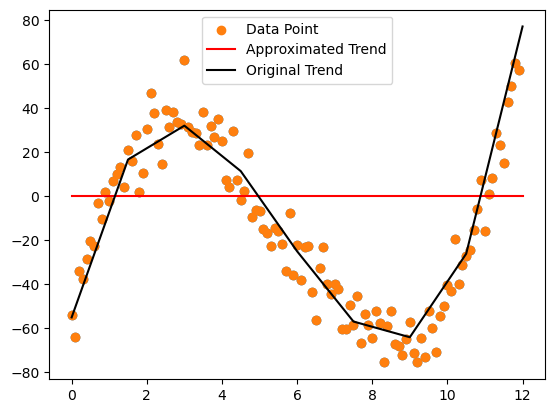

In [15]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def f(x):
  return (x-1)*(x-5)*(x-11) + 10*np.random.randn()

x = [i/10 for i in range(120)]
y = [f(i) for i in x]

plt.scatter(x,y)

def eval(x,m,a):
  bucket = int(x/a) + 1
  if bucket >= len(m):
    w = m[-1]
    b = a*(sum(m) - (len(m)-1)*w)
  else:
    w = m[bucket]
    b = a*(sum(m[:bucket+1]) - bucket*w)
  return w*x + b

lr = 0.05 # Learning Rate
iter = 1000

m = [np.random.randn() for _ in range(9)]   # Initialising with random slopes
costs = []

min_cost = float('inf')
min_m = []
a = 1.5
for e in range(1, iter+1):
    new = [0] * len(m)
    cost1 = 0
    cost2 = 0
    for i in range(len(x)):
        pred = eval(x[i], m, a)
        cost1 += ((y[i] - pred) ** 2) / len(x)
        for j in range(len(m)):
            cost2 += 0 if j <= 1 else 0.002 * ((m[j] - m[j - 1]) ** 2) / (2 * len(m) - 4)
            if j == int(x[i] / a) + 1:
                new[j] += 2 * (pred - y[i]) * (x[i] - int(x[i] / a)) / len(x)
            else:
                new[j] += 2 * (pred - y[i]) / len(x)
            if j > 1:
                new[j] += (0.002) * (m[j] - m[j - 1]) / (len(m) - 2)
            if j < len(m) - 1:
                new[j] += (0.002) * (m[j] - m[j + 1]) / (len(m) - 2)
    m = [i - lr * j for i, j in zip(m, new)]
    print("Iteration: {}, Cost: {}".format(e, cost1 + cost2))


def eval(x, m, a):
    bucket = int(x / a) + 1
    max_bucket_index = bucket if bucket > 0 else 1
    if max_bucket_index >= len(m):
        m.extend([0] * (max_bucket_index - len(m) + 1))
    if bucket >= len(m):
        w = m[-1]
        b = a * (sum(m) - (len(m) - 1) * w)
    else:
        w = m[bucket - 1]
        b = a * (sum(m[:bucket]) - (bucket - 1) * w)
    return w * x + b

# Calculate ydash
ydash = [eval(a * i, min_m, a) for i in range(0, int(12 / a) + 1)]

# Plotting
plt.scatter(x, y, label="Data Point")
plt.plot([a * i for i in range(0, int(12 / a) + 1)], ydash, color="r", label="Approximated Trend")
plt.plot([a * i for i in range(0, int(12 / a) + 1)], [(a * i - 1) * (a * i - 5) * (a * i - 11) for i in range(0, int(12 / a) + 1)], color="k", label="Original Trend")
plt.legend()

# Show plot
plt.show()


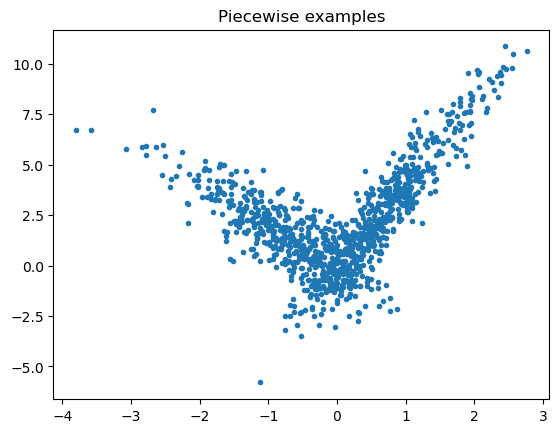

In [16]:
import numpy
import numpy.random as npr
X = npr.normal(size=(1000,4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1-t) + X[:, 2]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], y, ".")
ax.set_title("Piecewise examples");